<a href="https://colab.research.google.com/github/Muhammadsulton1/ML/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B8_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BB%D0%BE%D1%8F%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
upload = files.upload()

Saving lesson_3_data__1_.csv to lesson_3_data__1_.csv


задача - выявить максимально лояльных клиентов которым будет выдоваться скидка в размере 80%

In [ ]:
data = pd.read_csv('lesson_3_data__1_.csv',encoding='windows-1251')

In [ ]:
data.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,id_fam,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,10107064,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,10107064,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,10107064,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,10107064,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,10107064,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [ ]:
#tc - id пользователя, art_sp - бренд который определенный человек покупает
user_df = data[['tc','art_sp']]

In [ ]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [ ]:
user_df = user_df.rename(columns={'tc':'user_id','art_sp':'brand_info'})

In [ ]:
#видим что один человек покупает разные макароны одно и того же бренда его можно считать лояльным 
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


из списка с наименованием товара и брендов взять только название бренда

In [ ]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [ ]:
brand_name.split(' ')[-1]

'Store_Brand'

Функция для отбора только названия бренда

In [ ]:
def split_brand(brand_name_data):
  return brand_name_data.split(' ')[-1]

In [ ]:
user_df['brand_name'] = user_df['brand_info'].apply(split_brand) 

In [ ]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [ ]:
#равносильно нашей функции
#user_df['brand_info'].apply(lambda x: x.split(' ')[-1]) 

In [ ]:
users_purchases = user_df.groupby('user_id',as_index=False)\
  .agg({'brand_name':'count'})\
  .rename(columns={'brand_name':'purchases'})

#считаем сколько раз определнный айдишник выбрал этот бренд(т.е. купил)

Лояльных клиентов считаем людей которые выбрали один и тот же бренд n-раз и имеют тенденцию выбирать один бренд из множества

In [ ]:
users_purchases.head()

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [ ]:
#считаем медианное количество покупок
users_purchases['purchases'].median()
#2 - это 50% людей которые купили до 2х покупок и 50% которые купили больше 2х покупок

2.0

In [ ]:
users_purchases.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


по 75% процентилю видим что 25% пользователей совершили больше 5 покупок 
для первичного анализа отберем людей которые совершили больше 5 покупок

In [ ]:
users_purchases = users_purchases.query('purchases >= 5')

In [ ]:
users_purchases

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [ ]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


#Посчитаем сколько покупок одного бренда сделал пользователь

Возьмем для каждого пользователя первое его максимальное число покупок по какому-то бренду

In [ ]:
lovely_brand_purchases_df = user_df.groupby(['user_id','brand_name'],as_index=False)\
  .agg({'brand_info':'count'})\
  .sort_values(['user_id','brand_info'],ascending=[False,False])\
  .groupby('user_id')\
  .head(1)\
  .rename(columns={'brand_name':'lovely_brand','brand_info':'lovely_brand_purchases'})

посмотрим определенный user_id сколько покупок совершил в определенном бренде

In [ ]:
user_unique_brands = user_df.groupby('user_id',as_index=False)\
  .agg({'brand_name': pd.Series.nunique})\
  .rename(columns={'brand_name':'uniques_brands'})

In [ ]:
#получили уникальных брендов для user_id
user_unique_brands.head()

,user_id,uniques_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [ ]:
loyalty_df = users_purchases.merge(user_unique_brands,on='user_id')\
  .merge(lovely_brand_purchases_df,on='user_id')

#Отбираем всех пользоваталей у которых один уникальный магазин(часто выбираемый)

loyal_user - лояльные клиенты которые совершают разные покупки которые используют только один бренд 

In [ ]:
loyal_user = loyalty_df[loyalty_df['uniques_brands']==1]

,user_id,purchases,uniques_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


посчитаем какая доль покупок пришла на любимый бренд

In [ ]:
loyalty_df['loyalty_score'] = loyalty_df['lovely_brand_purchases']/ loyalty_df['purchases']

In [ ]:
loyalty_df.head()

,user_id,purchases,uniques_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


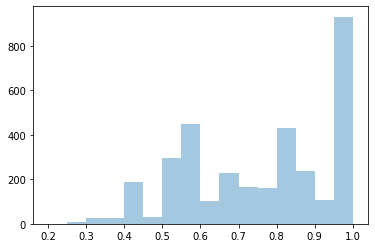

In [ ]:
ax = sns.distplot(x=loyalty_df['loyalty_score'],kde=False)

Посчитаем медианное значение лояльности для разных брендов и количество лояльных клиентов для магазина

In [ ]:
loyalty_brand = loyalty_df.groupby('lovely_brand',as_index=False)\
  .agg({'loyalty_score':'median','user_id':'count'})\
  .sort_values('loyalty_score',ascending=False)

In [ ]:
loyalty_brand

,lovely_brand,loyalty_score,user_id
3,Brand_4,0.818182,2041
6,Store_Brand,0.750000,715
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
4,Brand_5,0.600000,5
2,Brand_3,0.500000,115
5,Brand_7,0.444444,9


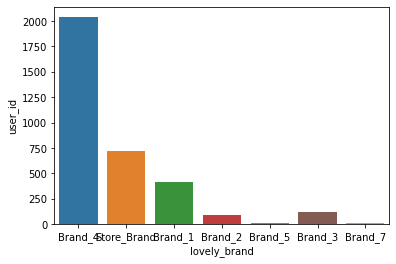

In [ ]:
sns.barplot(x=loyalty_brand['lovely_brand'],y=loyalty_brand['user_id']);